In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine("postgresql://{}:{}@{}:{}/{}".format(postgres_user, postgres_pw, postgres_host, postgres_port,postgres_db))
houseprices_df = pd.read_sql_query('select * from houseprices', con = engine)
engine.dispose()

In [3]:
houseprices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
houseprices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

### Looking for missing values, data exploration

In [9]:
percent_missing = (houseprices_df.isnull().sum()*100/houseprices_df.isnull().count()).sort_values(ascending = False)

In [10]:
total_missing = (houseprices_df.isnull().sum()).sort_values(ascending = False)

In [12]:
missing_data = pd.concat([percent_missing, total_missing], axis = 1, keys = (['Percent', 'Total']))

In [13]:
missing_data.head(20)

,Percent,Total
poolqc,99.520548,1453
miscfeature,96.301370,1406
alley,93.767123,1369
fence,80.753425,1179
fireplacequ,47.260274,690
lotfrontage,17.739726,259
garagecond,5.547945,81
garagetype,5.547945,81
garageyrblt,5.547945,81
garagefinish,5.547945,81


Text(0.5, 1.0, 'Histogram of Target variable(Sale Price)')

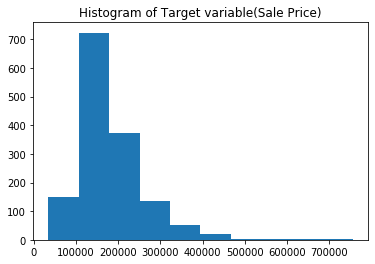

In [19]:
plt.hist(houseprices_df['saleprice'])
plt.title('Histogram of Target variable(Sale Price)')

### we can see that the plot above does not follow normal distribution

In [26]:
non_numeric_columns = houseprices_df.select_dtypes(['object']).columns
print("The number of non numeric columns are: {}".format(len(non_numeric_columns)))
print(non_numeric_columns)

The number of non numeric columns are: 43
Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')


In [27]:
numeric_columns = houseprices_df.select_dtypes(['integer', 'float']).columns
print("The number of numeric columns are: {}".format(len(numeric_columns)))
print(numeric_columns)

The number of numeric columns are: 38
Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')


In [38]:
np.abs(houseprices_df.iloc[:,1:].corr().loc[:, 'saleprice'].sort_values(ascending = False))

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
threessnporch    0.044584
bsmtfinsf2       0.011378
bsmthalfbath     0.016844
miscval          0.021190
lowqualfinsf     0.025606
yrsold           0.028923
overallcond      0.077856
mssubclass       0.084284
enclosedporch    0.128578
kitchenabvgr     0.135907
Name: saleprice, dtype: float64

### plotting barplots for non numeric variables to understand the relationship with saleprice

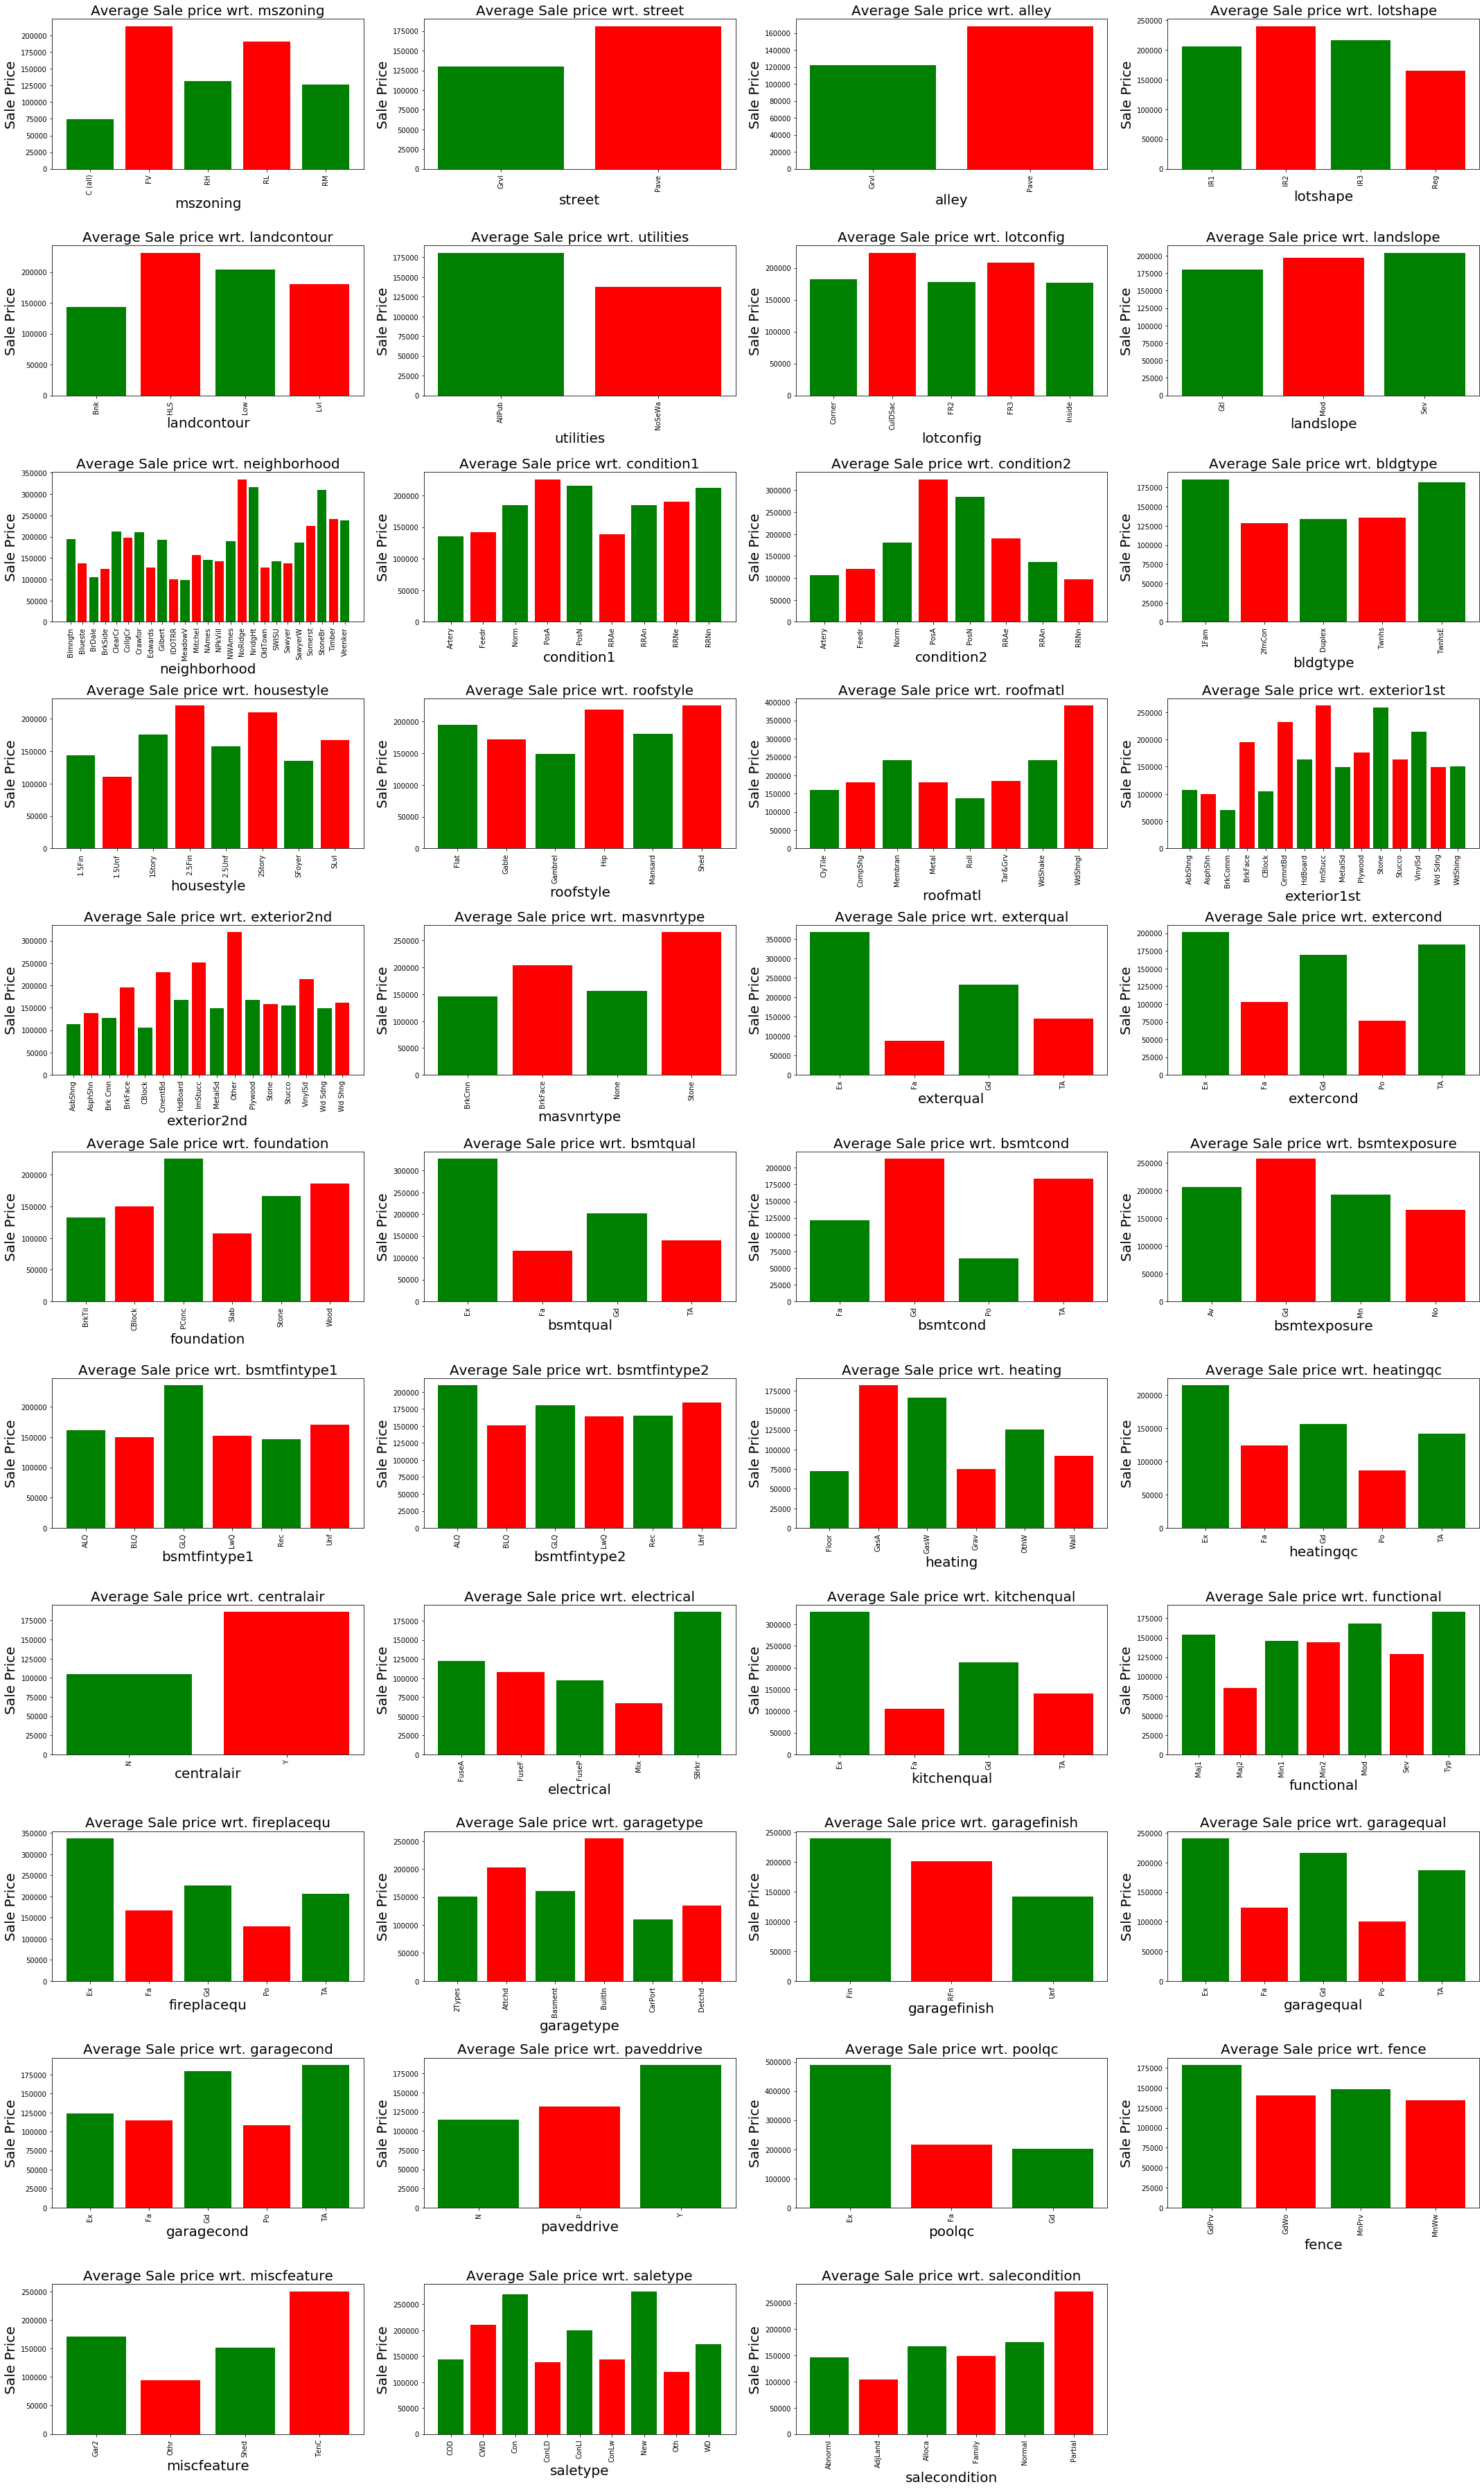

In [48]:
plt.figure(figsize = (30,50))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(11, 4, index+1)
    plt.bar(houseprices_df.groupby(column)['saleprice'].mean().index, houseprices_df.groupby(column)['saleprice'].mean(),
           color = ('green', 'red'))
    plt.title("Average Sale price wrt. {}".format(column), fontsize = 20)
    plt.ylabel("Sale Price", fontsize = 20)
    plt.xlabel(column, fontsize = 20)
    plt.xticks(rotation = "vertical")
plt.tight_layout()

### non numeric variables added to model: poolqc, centralair, electrical

In [49]:
houseprices_df1 = houseprices_df.copy()

In [50]:
houseprices_df1 = pd.concat([houseprices_df1, pd.get_dummies(houseprices_df1.poolqc, prefix = "poolqc", drop_first= True)],
                           axis = 1)
houseprices_df1 = pd.concat([houseprices_df1, pd.get_dummies(houseprices_df1.centralair, prefix = "centralair",
                                                            drop_first= True)], axis = 1)
houseprices_df1 = pd.concat([houseprices_df1, pd.get_dummies(houseprices_df1.electrical, prefix = "electrical",
                                                            drop_first = True)], axis = 1)
dummy_column_names = list(pd.get_dummies(houseprices_df1.poolqc, prefix = "poolqc", drop_first = True).columns)
dummy_column_names = dummy_column_names+list(pd.get_dummies(houseprices_df.centralair, prefix = "centralair",
                                                           drop_first = True).columns)
dummy_column_names = dummy_column_names+list(pd.get_dummies(houseprices_df1.electrical, prefix= "electrical",
                                                           drop_first = True).columns)

In [51]:
houseprices_df1.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,saletype,salecondition,saleprice,poolqc_Fa,poolqc_Gd,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,WD,Normal,208500,0,0,1,0,0,0,1
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,WD,Normal,181500,0,0,1,0,0,0,1
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,WD,Normal,223500,0,0,1,0,0,0,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,WD,Abnorml,140000,0,0,1,0,0,0,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,WD,Normal,250000,0,0,1,0,0,0,1


Final Features of our model

In [52]:
X = houseprices_df1[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', fi]+dummy_column_names]
y = houseprices_df1['saleprice']

In [53]:
import statsmodels.api as sm
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     400.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:28:54   Log-Likelihood:                -17476.
No. Observations:                1460   AIC:                         3.498e+04
Df Residuals:                    1447   BIC:                         3.505e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.109e+05   6203.960    -17.871      0.000   -1.23e+05   -9.87e+04
overallqual       2.269e+04   1081.475     20.977      0.000    2.06e+04    2.48e+04
grlivarea           47.7545      2.491     19.171      0.000      42.868      52.641
garagecars        1.201e+04   3009.151      3.991      0.000    6106.397    1.79e+04
garagearea          21.3727     10.382      2.059      0.040       1.008      41.738
totalbsmtsf         33.3265      2.903     11.481      0.000      27.632      39.021
poolqc_Fa        -1.039e+04   2.72e+04     -0.382      0.702   -6.37e+04    4.29e+04
poolqc_Gd        -1.355e+05   2.28e+04     -5.947      0.000    -1.8e+05   -9.08e+04
centralair_Y      1.125e+04   4634.546      2.428      0.015    2160.776    2.03e+04
electrical_FuseF  6110.5992   8608.745      0.710      0.478   -1.08e+04     2.3e+04
electrical_FuseP -4038.4674   2.28e+04     -0.177      0.859   -4.88e+04    4.07e+04
electrical_Mix   -4.951e+04   3.86e+04     -1.282      0.200   -1.25e+05    2.62e+04
electrical_SBrkr  4574.5683   4257.395      1.074      0.283   -3776.758    1.29e+04
==============================================================================
Omnibus:                      398.577   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17732.320
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                      20.046   Cond. No.                     7.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""